# Analyzing Utilization of Telehealth for Medicare Population

The COVID-19 pandemic changed American's relationship to telehealth. Let's take a look at a recent CMS dataset to see the utilization of telehealth appointments. 

from https://data.cms.gov/summary-statistics-on-use-and-payments/medicare-service-type-reports/medicare-telehealth-trends

First, I am curious to see how telehealth use changed over time, so let's look at the quarterly data for each of the states and the nation overall. 

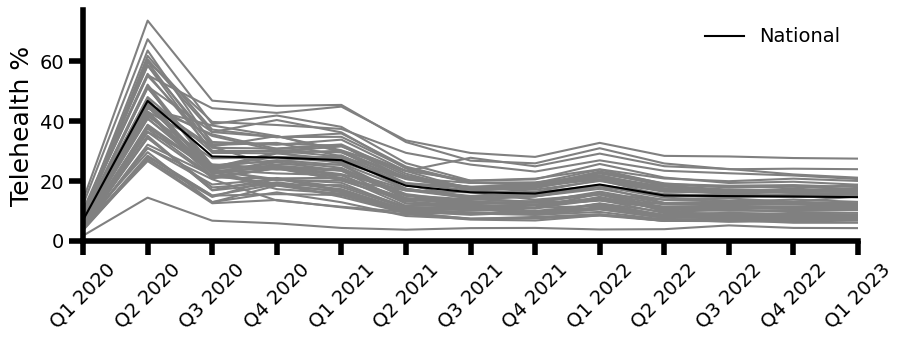

In [85]:
import requests
import json 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy 

# pull data from CMS site
r = requests.get('https://data.cms.gov/data-api/v1/dataset/939226be-b107-476e-8777-f199a840138a/data?' + 
                    'filter[Bene_Mdcd_Mdcr_Enrl_Stus]=All' + 
                    '&filter[Bene_Race_Desc]=All' + 
                    '&filter[Bene_Sex_Desc]=All' + 
                    '&filter[Bene_Mdcr_Entlmt_Stus]=All' + 
                    '&filter[Bene_Age_Desc]=All' + 
                    '&filter[Bene_RUCA_Desc]=All' 
                )
dataOverall = pd.DataFrame.from_records(r.json())

# clean data 
dataOverall = dataOverall[dataOverall['quarter']!='Overall']
dataOverall = dataOverall[dataOverall['Bene_Geo_Desc']!='Missing Data']

# convert data types for plotting 
dataOverall['quarter'] = dataOverall['quarter'].astype('int')
dataOverall['Year'] = dataOverall['Year'].astype('int')
dataOverall['Pct_Telehealth'] = dataOverall['Pct_Telehealth'].astype('float')

# plot state and national telehealth percent usage
fig,ax = plt.subplots(figsize=(10,3))
states = dataOverall['Bene_Geo_Desc'].unique()
for i in range(len(states)):
    if states[i] != 'National' and states[i] != 'Missing Data':
        stateData = dataOverall[dataOverall['Bene_Geo_Desc']==states[i]]
        quarter_year = (stateData['Year'] - 2020)*4 + stateData['quarter'] - 1
        plt.plot(quarter_year,stateData['Pct_Telehealth']*100,color='gray')
nationalData = dataOverall[dataOverall['Bene_Geo_Desc']=='National']
quarter_year = (nationalData['Year'] - 2020)*4 + nationalData['quarter'] - 1
plt.plot(quarter_year,nationalData['Pct_Telehealth']*100,color='k',label='National')

# format plot 
ax.legend(frameon=0,fontsize=14)
ax.set_ylabel('Telehealth %',fontsize=18)
xticklabels = ('Q' + nationalData['quarter'].astype('str') + ' ' +  nationalData['Year'].astype('str'))
ax.set_xticks(np.linspace(0,12,13),xticklabels,rotation=45)
ax.set_xlim([0,12])
ax.set_ylim(ymin=0)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.tick_params(axis='both',width=4,length=10,labelsize=14)

Here we can see a few intuitive trends:
 1. A huge spike in telehealth visits upon the breakout of the COVID-19 pandemic in the US in Q2 2020
 2. A moderate level as the pandemic raged until mass vaccination in Q2 2021
 3. A decline for the remainder of 2021 followed by a small bump during the Omicron wave in Q1 2022
 4. Perhaps most telling of the pandemic's effect, an increased percentage of visits in Q1 2023 compared to Q1 2020

## Examining Rural vs Urban
One narrative behind telehealth is that it gives more access to healthcare to rural communities. Let's compare the telehealth percentage between rural and urban enrollees over this time course. 

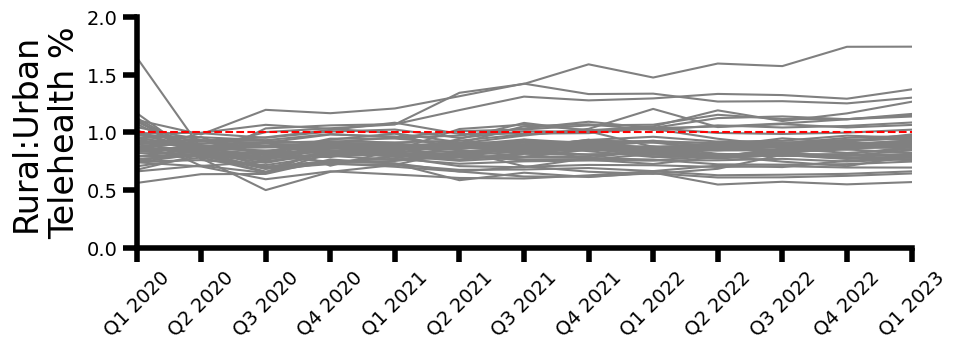

In [11]:
# pull data from CMS site
r = requests.get('https://data.cms.gov/data-api/v1/dataset/939226be-b107-476e-8777-f199a840138a/data?' + 
                    'filter[Bene_Mdcd_Mdcr_Enrl_Stus]=All' + 
                    '&filter[Bene_Race_Desc]=All' + 
                    '&filter[Bene_Sex_Desc]=All' + 
                    '&filter[Bene_Mdcr_Entlmt_Stus]=All' + 
                    '&filter[Bene_Age_Desc]=All' + 
                    '&filter[Bene_RUCA_Desc]=Rural' 
                )
ruralData = pd.DataFrame.from_records(r.json())

r = requests.get('https://data.cms.gov/data-api/v1/dataset/939226be-b107-476e-8777-f199a840138a/data?' + 
                    'filter[Bene_Mdcd_Mdcr_Enrl_Stus]=All' + 
                    '&filter[Bene_Race_Desc]=All' + 
                    '&filter[Bene_Sex_Desc]=All' + 
                    '&filter[Bene_Mdcr_Entlmt_Stus]=All' + 
                    '&filter[Bene_Age_Desc]=All' + 
                    '&filter[Bene_RUCA_Desc]=Urban' 
                )
urbanData = pd.DataFrame.from_records(r.json())

# clean data 
ruralData = ruralData[ruralData['quarter']!='Overall']
ruralData = ruralData[ruralData['Bene_Geo_Desc']!='Missing Data']
ruralData = ruralData[ruralData['Bene_Geo_Desc']!='District Of Columbia']
ruralData = ruralData[ruralData['Bene_Geo_Desc']!='National']
urbanData = urbanData[urbanData['quarter']!='Overall']
urbanData = urbanData[urbanData['Bene_Geo_Desc']!='Missing Data']
urbanData = urbanData[urbanData['Bene_Geo_Desc']!='District Of Columbia']
urbanData = urbanData[urbanData['Bene_Geo_Desc']!='National']

# convert data types for plotting 
ruralData['quarter'] = ruralData['quarter'].astype('int')
ruralData['Year'] = ruralData['Year'].astype('int')
ruralData['Pct_Telehealth'] = ruralData['Pct_Telehealth'].astype('float')
urbanData['quarter'] = urbanData['quarter'].astype('int')
urbanData['Year'] = urbanData['Year'].astype('int')
urbanData['Pct_Telehealth'] = urbanData['Pct_Telehealth'].astype('float')

# plot rural:urban percentages over time 
fig,ax = plt.subplots(figsize=(10,3))
states = ruralData['Bene_Geo_Desc'].unique()
for i in range(len(states)):
    stateRural = ruralData[ruralData['Bene_Geo_Desc']==states[i]]
    stateUrban = urbanData[urbanData['Bene_Geo_Desc']==states[i]]
    quarter_year = (stateRural['Year'] - 2020)*4 + stateRural['quarter'] - 1
    plt.plot(quarter_year,stateRural['Pct_Telehealth']/stateUrban['Pct_Telehealth'],color='gray')
plt.hlines(1,0,14,linestyle='dashed',color='r')

# format plot 
xticklabels = ('Q' + nationalData['quarter'].astype('str') + ' ' +  nationalData['Year'].astype('str'))
ax.set_ylabel('Rural:Urban\nTelehealth %',fontsize=24)
ax.set_xticks(np.linspace(0,12,13),xticklabels,rotation=45)
ax.set_xlim([0,12])
ax.set_ylim([0,2])
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.tick_params(axis='both',width=4,length=10,labelsize=14)


These data surprised me as they indicate that more commonly it is urban patients taking advantage of telehealth eligible visits than rural patients. I then got curious which of the states were the exceptions. 

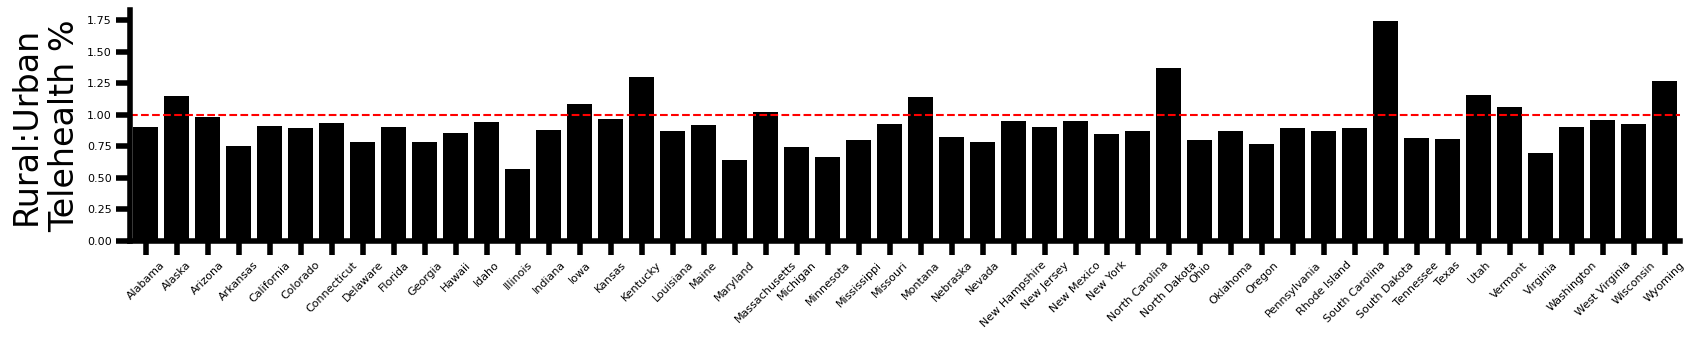

In [46]:
states = ruralData['Bene_Geo_Desc'].unique()
q12023 = np.zeros(len(states))
for i in range(len(states)):
    stateRural = ruralData[ruralData['Bene_Geo_Desc']==states[i]]
    stateUrban = urbanData[urbanData['Bene_Geo_Desc']==states[i]]
    ratio = stateRural['Pct_Telehealth'].to_numpy()/stateUrban['Pct_Telehealth'].to_numpy()
    q12023[i] = ratio[-1]

fig,ax = plt.subplots(figsize=(20,3))
ax.set_ylabel('Rural:Urban\nTelehealth %',fontsize=24)
plt.bar(states,q12023,color='k')
ax.hlines(1,-0.5,49.5,color='r',linestyle='dashed')
plt.xticks(np.linspace(0,49,50),states,rotation=45)
plt.xlim([-0.5,49.5]);
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.tick_params(axis='both',width=4,length=10,labelsize=8)

A quick look at the Q1 2023 data shows us that largely rural states (Alaska, Kentucky, the Dakotas) make up the states with the higher ratio of rural telehealth usage. I then wondered how much a states urban vs rural population correlates with this ratio. For this, I'm going to make use of 538's Urbanization Index from the 2020 Census (https://fivethirtyeight.com/features/how-urban-or-rural-is-your-state-and-what-does-that-mean-for-the-2020-election/) 

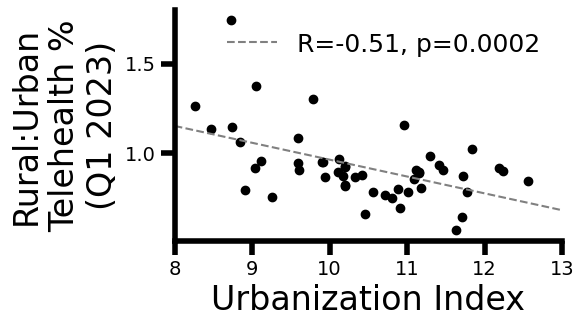

In [122]:
urbIndex = pd.read_csv('urbanization-state.csv')
states = ruralData['Bene_Geo_Desc'].unique()

stateUrbIndeces = np.zeros(len(states))
for i in range(len(states)):
    stateUrbIndeces[i] = urbIndex.loc[urbIndex['state'] == states[i],'urbanindex'].iloc[0]

fit = scipy.stats.linregress(stateUrbIndeces,q12023)

fig,ax = plt.subplots(figsize=(5,3))
plt.scatter(stateUrbIndeces,q12023,color='k')
xs = np.linspace(8,13,20)
ax.plot(xs,fit[0]*xs+fit[1],color='gray',linestyle='dashed',label='R=%.2f, p=%.4f' % (fit[2],fit[3]))
ax.set_xlim([8,13])
ax.legend(frameon=0,fontsize=18)
ax.set_xlabel('Urbanization Index',fontsize=24)
ax.set_ylabel('Rural:Urban\nTelehealth %\n(Q1 2023)',fontsize=24)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.tick_params(axis='both',width=4,length=10,labelsize=14)
